In [14]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [15]:
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return x * (1 - x)

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                error = Y_train[i] - prediction
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)

                error = Y_validation[i] - prediction
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [16]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 20000
N_inputs = 2
train_size = 0.8
N_validation = int((1 - train_size) * N_samples)

X_train = np.random.randint(0, 2, size=(N_samples, N_inputs))
Y_train = np.prod(X_train, axis=1)  # Puerta AND: el producto de todos los elementos debe ser 1 para devolver 1, de lo contrario, devuelve 0

X_validation = X_train[-N_validation:]
Y_validation = Y_train[-N_validation:]

X_train = X_train[:N_samples - N_validation]
Y_train = Y_train[:N_samples - N_validation]

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])


X_data (first 5 samples):
[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]]
Y_data (first 5 samples):
[0 0 0 0 0]


In [17]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

epoch: 0 | train error: 0.006062887542311353 | val error: 0.00015586554038479294
epoch: 10 | train error: 1.427773909186298e-06 | val error: 1.2797267678690323e-06
epoch: 20 | train error: 3.726803066765893e-07 | val error: 3.506643476852505e-07
epoch: 30 | train error: 1.6807223117323961e-07 | val error: 1.6081394143265392e-07
epoch: 40 | train error: 9.523494201904706e-08 | val error: 9.189862427207543e-08
epoch: 50 | train error: 6.121832753478325e-08 | val error: 5.937740163116679e-08
epoch: 60 | train error: 4.263702392579086e-08 | val error: 4.149713406720171e-08
epoch: 70 | train error: 3.1390419413123243e-08 | val error: 3.062647761393246e-08
epoch: 80 | train error: 2.4070752199815742e-08 | val error: 2.3528431490805326e-08
epoch: 90 | train error: 1.90418721206064e-08 | val error: 1.8639699629195684e-08


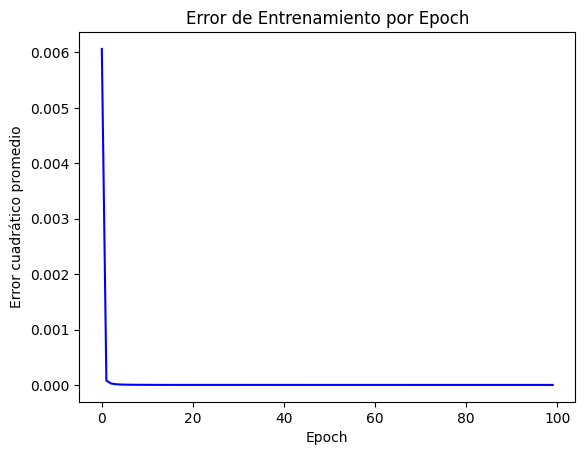

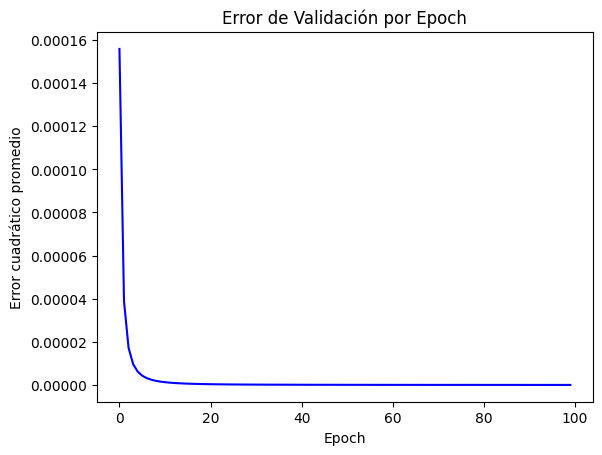

In [18]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [20]:
# Validar el modelo
predictions = []
for i in range(X_validation.shape[0]):
    prediction = perceptron_and.predict(X_validation[i])
    predictions.append(round(prediction))

# Generar las predicciones
predictions = np.array(predictions)

# Calcular la matriz de confusión
confusion_matrix = np.zeros((2, 2))
for i in range(Y_validation.shape[0]):
    confusion_matrix[Y_validation[i]][predictions[i]] += 1

# Visualizar la matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix)

Matriz de Confusión:
[[3041.    0.]
 [   0.  958.]]
